Clara Liff

#1 <br>
<br>
Y(1,1) = X(1,1)B(1,1) + X(1,2)B(2,1) + U(1,1) <br>
Y(2,1) = X(2,1)B(1,1) + X(2,2)B(2,1) + U(2,1) <br>
Y(3,1) = X(3,1)B(1,1) + X(3,2)B(2,1) + U(3,1) <br>

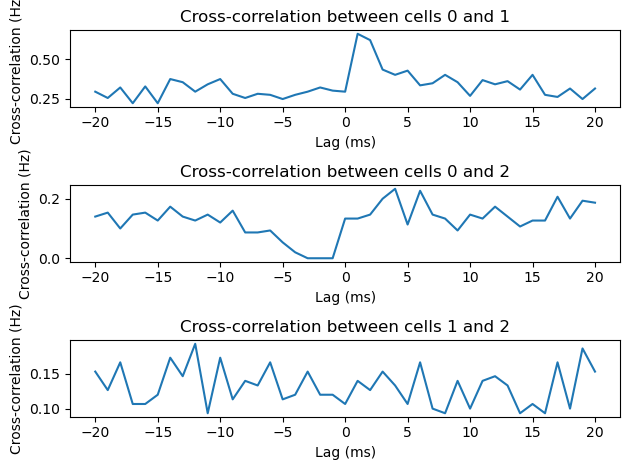

In [57]:
#2ab

import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from calcccg import *

T = scipy.io.loadmat('prob2.mat')['T'][0,0]
dt = scipy.io.loadmat('prob2.mat')['dt'][0,0]
Ntrials = scipy.io.loadmat('prob2.mat')['Ntrials'][0,0]
spikes = scipy.io.loadmat('prob2.mat')['spikes'][:,0]

Nlags = 20

t = dt*np.arange(-Nlags,Nlags+1)

ccg_01 = np.zeros(len(t))

calcccg_all = np.zeros((41,100))
for i in range(100):
    calcccg_all[:,i] = calcccg(spikes[0][:,i],spikes[1][:,i],Nlags,dt)

ccg_01 = np.mean(calcccg_all,axis=1)

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.plot(1000*t,ccg_01)
ax1.set_title('Cross-correlation between cells 0 and 1')
ax1.set_xlabel('Lag (ms)')
ax1.set_ylabel('Cross-correlation (Hz)')

#b

ccg_02 = np.zeros(len(t))

calcccg_all = np.zeros((41,100))
for i in range(100):
    calcccg_all[:,i] = calcccg(spikes[0][:,i],spikes[2][:,i],Nlags,dt)

ccg_02 = np.mean(calcccg_all,axis=1)

ax2.plot(1000*t,ccg_02)
ax2.set_title('Cross-correlation between cells 0 and 2')
ax2.set_xlabel('Lag (ms)')
ax2.set_ylabel('Cross-correlation (Hz)')


ccg_12 = np.zeros(len(t))

calcccg_all = np.zeros((41,100))
for i in range(100):
    calcccg_all[:,i] = calcccg(spikes[1][:,i],spikes[2][:,i],Nlags,dt)

ccg_12 = np.mean(calcccg_all,axis=1)

ax3.plot(1000*t,ccg_12)
ax3.set_title('Cross-correlation between cells 1 and 2')
ax3.set_xlabel('Lag (ms)')
ax3.set_ylabel('Cross-correlation (Hz)')

plt.tight_layout()

It looks like there are connections between 0-1 and 0-2

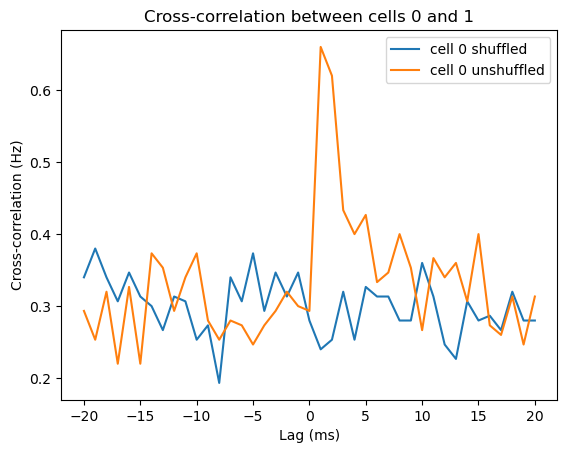

In [72]:
#c

shuf_0 = spikes[0][:, np.random.permutation(spikes[0].shape[1])]

ccg_0s1 = np.zeros(len(t))

calcccg_all = np.zeros((41,100))
for i in range(100):
    calcccg_all[:,i] = calcccg(shuf_0[:,i],spikes[1][:,i],Nlags,dt)

ccg_0s1 = np.mean(calcccg_all,axis=1)

plt.plot(1000*t,ccg_0s1,label='cell 0 shuffled')
plt.plot(1000*t,ccg_01,label='cell 0 unshuffled')

plt.title('Cross-correlation between cells 0 and 1')
plt.xlabel('Lag (ms)')
plt.ylabel('Cross-correlation (Hz)')
plt.legend()
